In [75]:
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt
import scipy.special as sc

In [ ]:
N = 50
D = [-9.444592629563482,-10.103964599161293,-8.746979162444635,-10.944961467055592,-9.447188347628195,-9.060344688696855,-9.426115414313616,-9.02555566184701,-9.540732927053396,-11.392027091569773,-8.999455424709417,-11.820785273051301,-9.430324370148053,-9.92614734856855,-10.725679789912675,-7.697873092371246,-9.450613458646874,-11.058414746803724,-8.638717458509106,-9.371729714225125,-10.84462268890643,-10.608025111882215,-8.727914899558042,-9.514896558274827,-10.129694491565473,-9.348428556903906,-8.635812598376933,-9.958800611275548,-8.355993498975597,-10.95508350798931,-9.651978307652078,-9.484709943109472,-9.021378525957436,-9.625505024615329,-11.308348995476212,-8.409235384839777,-10.056906481340834,-10.209740159800557,-9.516607873533568,-10.22398148970632,-9.6084239630195,-9.712277315869278,-9.489347842731672,-11.973922171083858,-9.954189848858904,-11.539698898508025,-9.481137040410866,-11.021115533806897,-10.856734303667986,-9.798001359325163]
D_h = sorted(D)
s = 1
a = -10

eps_1 = 0.1
eps_2 = 0.05
eps_3 = 0.01

1.245130568924489
0.0900271197673595
KstestResult(statistic=0.176088053749834, pvalue=0.0900271197673595)


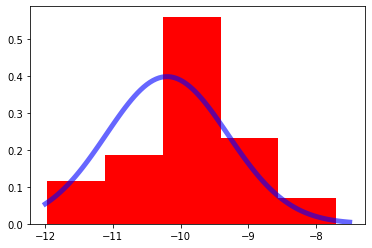

In [180]:
l = 1/N
norm = np.zeros(N)

#значение функции нормального распределения в точках выборки
for i in range(0,N):
    norm[i] = st.norm.cdf(D_h[i], loc = -10, scale = 1)

#критерий Колмогорова
def Crit_K(norm):
    d = 0
    for i in range(0, N-1):
        d_0 = 0
        d_under = abs(norm[i] - l*i)
        d_above = abs(norm[i] - l*(i+1))
        
        if d_under > d_above: d_0 = d_under
        else: d_0 = d_above
        if d_0 > d: d = d_0
    
    d = np.sqrt(N) * d
    return d

ro = Crit_K(norm)
print(ro)

#по идее p-value
print(sc.kolmogorov(ro))
     
#проверка на встроенном тесте
print(st.kstest(D, "norm", args = (-10, 1), mode = 'asymp'))


Hist = plt.hist(D,bins = 5,density=True,color = 'red')
plt.plot(np.linspace(-12, -7.5, 100), st.norm.pdf(np.linspace(-12, -7, 100), loc = -10, scale = 1), 'b', lw=5, alpha=0.6)


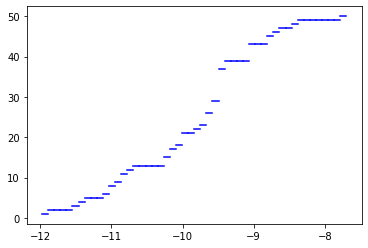

In [164]:
def plot_empirical_cdf(sample):
    hist, edges = np.histogram(sample, bins=len(sample))
    Y = hist.cumsum()
    for i in range(len(Y)):
        plt.plot([edges[i], edges[i+1]],[Y[i], Y[i]], c="blue")
    plt.show()
plot_empirical_cdf(D)

In [219]:
#считаем наблюдаемые чистоты

#делим интервал выборки на 10 равных частей
l = (abs(D_h[0]) - abs(D_h[N - 1]))/10
d_min = D_h[0]
count = 0
help = np.zeros(10)
num = np.zeros(10)
n = np.zeros(10)

#считаем сколько точек попадает в интервалы 
for i in range(1,11):
    for j in range(0,N):
        if (d_min + l*(i - 1) <= D[j]) and (D[j]<= d_min + l*i):
            count = count + 1
    help[i - 1] =  + count/N
    num [i - 1] = count
    count = 0
for i in range (1,10):
    help[i] = help[i - 1] + help[i]
    
print(num)
print (D_h[49])

[ 2.  3.  7.  1.  8. 16.  6.  4.  2.  1.]
-7.697873092371246


In [268]:
print(st.norm.ppf(0.2, (-10, 1 )))
print(st.norm.ppf(0.4, (-10, 1 )))
print(st.norm.ppf(0.6, (-10, 1 )))
print(st.norm.ppf(0.8, (-10, 1 )))


[-10.84162123   0.15837877]
[-10.2533471   0.7466529]
[-9.7466529  1.2533471]
[-9.15837877  1.84162123]


In [261]:
#Критерий хи 2
part = [-np.inf,-10.84162123, -10.2533471, -9.7466529, -9.15837877, np.inf]
p = np.zeros(len(part) - 1)
hits = np.zeros(len(part) - 1)

for i in range(0,len(part) - 1):
    p[i] = (st.norm(loc = -10, scale = 1).cdf(part[i+1]) - st.norm(loc = -10, scale = 1).cdf(part[i]))
    for k in range(0, N):
            if (D[k] >= part[i] and D[k] < part[i + 1]):
                hits[i] = hits[i] + 1
d = 0
for i in range(0 , len(part) - 1):
    d = d + (hits[i] - N * p[i]) ** 2 / (N * p[i])

#принятие критерия (квантиль)
print(st.chi2.ppf(1 - eps_1, len(part) - 2))

#p-value
print(1 - st.chi2.cdf(d, len(part) - 2))

#проверяем на встроенном тесте
print(st.chisquare(hits, N*p))
print(N*p)

0.0205873727413155
Power_divergenceResult(statistic=11.599999946154341, pvalue=0.02058737274131552)
[10.00000005 10.00000001  9.99999988 10.00000001 10.00000005]


In [269]:
s = 1
a = -10

eps_1 = 0.1
eps_2 = 0.05
eps_3 = 0.01
x_mean = 0

#среднее
for i in range (0,N):
    x_mean = x_mean + D[i]
x_mean = x_mean/N

#выборочная дисперсия
S = 0
S1 = 0
for i in range (0,N):
    S = S + (D[i] - a)**2
    S1 = S1 + (D[i] - x_mean)**2
S = S/N
S1 = S1/N

def C_intervals(eps):
# ищем сигма, а известно
    sigma_p = N*S/st.chi2(N).ppf(eps/2)
    sigma_m = N*S/st.chi2(N).ppf(1 - eps/2)
    print(sigma_p)
    print(sigma_m)
    print()
    
# ищем сигма, а неизвестно
    sigma_p_u = N*S1/st.chi2(N).ppf(eps/2)
    sigma_m_u = N*S1/st.chi2(N).ppf(1 - eps/2)
    print(sigma_p_u)
    print(sigma_m_u)
    print()

# ищем a,сигма известно
    a_m = x_mean - s*st.norm(loc= 0, scale= 1).ppf(1 - eps/2)/math.sqrt(N)
    a_p = x_mean + s*st.norm(loc= 0, scale= 1).ppf(1 - eps/2)/math.sqrt(N)
    print(a_m)
    print(a_p)
    print()

# ищем а, сигма неизвестно
    a_p_u = x_mean - N*S1*st.t(N - 1).ppf(eps/2)/(math.sqrt(N)*(N - 1))
    a_m_u = x_mean + N*S1*st.t(N - 1).ppf(eps/2)/(math.sqrt(N)*(N - 1))
    print(a_m_u)
    print(a_p_u)
    print()

m = C_intervals(eps_1)

1.3032731324382107
0.6711716913843315

1.2689390016301194
0.6534899820993669

-10.078111743801376
-9.612876882330706

-10.058950766889094
-9.632037859242988



In [214]:
#случай с двумя выборками
# Критерий Фишера и Стьюдента
N_1 = 20
N_2 = 30
H_1 = np.zeros(20)
H_2 = np.zeros(30)

for i in range(0,20):
    H_1[i] = D[i]
for i in range(20,50):
    H_2[i - 20] = D[i]
    
def mean(H,N):
    x_mean = 0
    for i in range (0,N):
        x_mean = x_mean + H[i]
        x_mean = x_mean/N
    return x_mean

def S_2(H,N,x_m):
    S = 0
    for i in range (0,N):
        S = S + (D[i] - x_m)**2
        S = S/N
    return S

x_1 = mean(H_1,N_1)
x_2 = mean(H_2,N_2)
S_H_1 = S_2(H_1,N_1,x_1)
S_H_2 = S_2(H_2,N_2,x_2)

#print(S_H_1)
#print(S_H_2)

#Критерий Фишера 
def F_crit(S_H_1,S_H_2,N_1,N_2,eps):
    d = S_H_1 / S_H_2
    f1 = st.f.ppf(eps/2, N_1 - 1, N_2 - 1)
    f2 = st.f.ppf(1 - eps/2, N_1 - 1, N_2 - 1)
    return d,f1,f2

t1,t2,t3 = F_crit(S_H_1,S_H_2,N_1,N_2,eps_1)

#p - value
print( 1 - st.f(N_1 - 1,N_2 - 1).cdf(t1))

print (F_crit(S_H_1,S_H_2,N_1,N_2,eps_1))

print()
#Критерий Стьюдента 
t = (x_2 - x_1)/(math.sqrt((N_1 - 1)*S_H_1**2 + (N_2 - 1)*S_H_2**2))*math.sqrt(N_1*N_2*(N_1 + N_2 - 2)/(N_1 + N_2))
print(t)

c = st.t(N_1 + N_2 - 2).ppf(1 - eps_1/2)
print(c)
print()

#p - value
print(1 - st.t(N_1 + N_2 - 2).cdf(abs(t)))

0.4193798683865846
(1.0761172269663437, 0.4814141058955075, 1.9581455228412208)

0.13379266601438775
1.6772241953450393

0.4470629578578631


In [191]:
#st.ttest_ind(H_1,H_2)
#st.t.isf(eps_1, df=48)

#принятие критерия Колмогорова
#print(sc.kolmogi(1 - eps_1))
